# Scientific Workflow for Data Science Example

Author: Alexander Schindler (AIT/TU Wien)

Data analysis part from akquinet: Predicting House Prices On Kaggle: A Gentle Introduction To Data Science – [Part I](https://blog.akquinet.de/2017/09/19/predicting-house-prices-on-kaggle-part-i/) and [Part II](https://blog.akquinet.de/2017/10/25/predicting-house-prices-on-kaggle-a-gentle-introduction-to-data-science-part-ii/)

# Import Data Processing Libraries

In [1]:
# Numeric processing
import numpy as np

# in-memory data structures
import pandas as pd

# standard plotting library
import matplotlib.pyplot as plt

# prettify plots
import seaborn as sns

# embedd plots in notebook
%matplotlib notebook

# Data


## House Prices: Advanced Regression Techniques

Predict sales price a house in Ames, Iowa, USA.

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

![Kaggle-Datset Image](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png "")

### Load Data

In [2]:
DATA_ROOT_DIR         = "./data"

DATASET_PATH_TRAIN    = "%s/train.csv.gz" % DATA_ROOT_DIR
DATASET_PATH_TEST     = "%s/test.csv.gz"  % DATA_ROOT_DIR

DATA_DESCRIPTION_FILE = "%s/data_description.txt" % DATA_ROOT_DIR

read the csv-data-file

**Train Data**

In [3]:
data_train = pd.read_csv(DATASET_PATH_TRAIN, compression="gzip", index_col=0)

data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_train.shape

(1460, 80)

**Test Data**

In [5]:
data_test = pd.read_csv(DATASET_PATH_TEST, compression="gzip", index_col=0)

data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
data_test.shape

(1459, 79)

In [7]:
np.setdiff1d(data_train.columns, data_test.columns)

array(['SalePrice'], dtype=object)

**Data description Lookup table**

read the data description file

In [8]:
data_description_dictionary = {}

with open(DATA_DESCRIPTION_FILE) as dsf:
    for line in dsf:
        if (line.find(":") != -1) & (line.find("\t") == -1):
            abbreviation, description = line.split(":",1)
            data_description_dictionary[abbreviation.strip()] = description.strip()

In [9]:
data_description_dictionary["MSZoning"]

'Identifies the general zoning classification of the sale.'

## Get a Feel for the Data

**Data composition**

* Data types
* Attribute names - semantically indicating?

In [10]:
# create a list of data-types for a quick analysis
data_train_types = pd.DataFrame(data_train.dtypes, columns=["type"]).reset_index()
data_train_types

,index,type
0,MSSubClass,int64
1,MSZoning,object
2,LotFrontage,float64
3,LotArea,int64
4,Street,object
5,Alley,object
6,LotShape,object
7,LandContour,object
8,Utilities,object
9,LotConfig,object


What are the most frequent data-types?

<IPython.core.display.Javascript object>


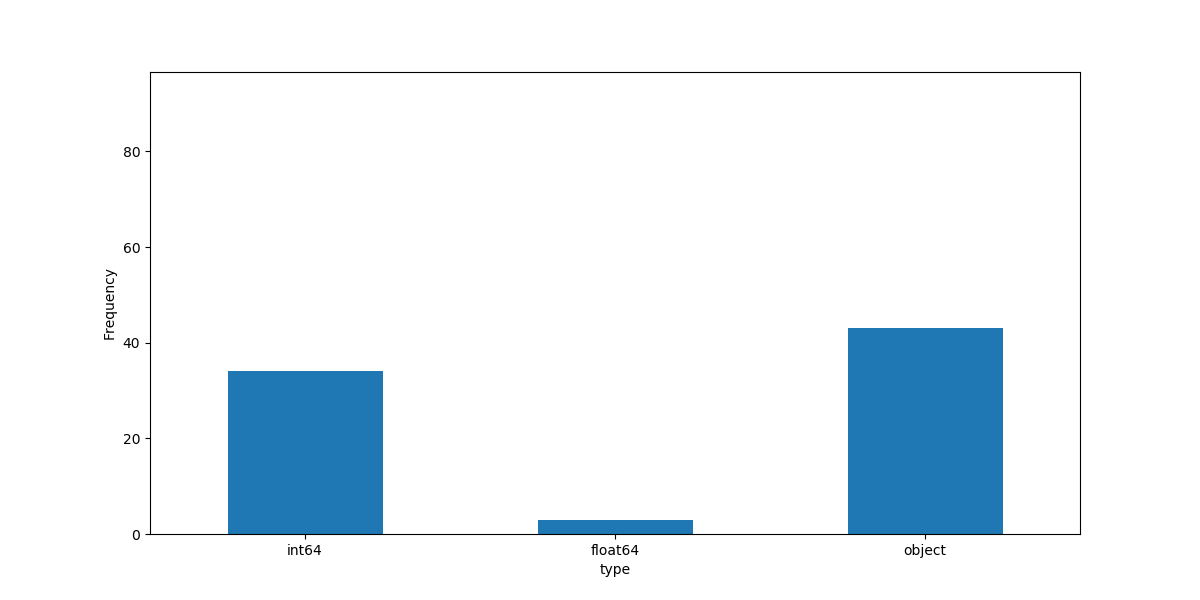

In [11]:
data_train_types.groupby("type").count().plot(kind='bar', legend=False);

### Integers

What are Int-values used for?

* counting
* measuring (areas/m²)
* annual disclosures (construction year)
* monetary values (price)

In [12]:
int_values = data_train_types[data_train_types["type"] == "int64"]["index"].values

data_train[int_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
OverallCond,5,8,5,5,5,5,5,6,5,6,...,5,5,5,5,5,5,6,9,6,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950,...,1974,2009,2005,2006,2005,2000,1988,2006,1996,1965
BsmtFinSF1,706,978,486,216,655,732,1369,859,0,851,...,0,0,547,0,410,0,790,275,49,830
BsmtFinSF2,0,0,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,163,0,1029,290
BsmtUnfSF,150,284,434,540,490,64,317,216,952,140,...,896,1573,0,1140,811,953,589,877,0,136
TotalBsmtSF,856,1262,920,756,1145,796,1686,1107,952,991,...,896,1573,547,1140,1221,953,1542,1152,1078,1256


### Floats

What are floats used for?

* apparently used as integers
* maybe wrong interpretation by csv-reader?
* could be converted to integers? (caution! check first! every transformation could destroy information)

In [13]:
float_values = data_train_types[data_train_types["type"] == "float64"]["index"].values

data_train[float_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,...,0.0,194.0,80.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0
GarageYrBlt,2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,NaN,2008.0,2005.0,NaN,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0


### Objects

What are objects used for?

* Strings
* apparently categorical data
* no freetext recognizable

In [14]:
object_values = data_train_types[data_train_types["type"] == "object"]["index"].values

data_train[object_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


#### Check assumption that strings represent categorical data and not Freetext

* count unique values for each attribute

In [15]:
data_train[object_values].apply(lambda x : x.unique().shape[0]).sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType1      7
GarageType        7
BsmtFinType2      7
RoofStyle         6
Heating           6
SaleCondition     6
Electrical        6
FireplaceQu       6
GarageQual        6
GarageCond        6
Foundation        6
MasVnrType        5
BldgType          5
LotConfig         5
BsmtQual          5
MSZoning          5
ExterCond         5
BsmtCond          5
BsmtExposure      5
HeatingQC         5
MiscFeature       5
Fence             5
LotShape          4
LandContour       4
ExterQual         4
GarageFinish      4
KitchenQual       4
PoolQC            4
PavedDrive        3
LandSlope         3
Alley             3
Utilities         2
CentralAir        2
Street            2
dtype: int64

**Example of categorical Data**

In [16]:
data_train.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

# Data Exploration and Visualization

### Data Value Ranges

* how are the value ranges within the attributes?
* how are the value ranges between the attributes?

In [17]:
data_train[int_values.tolist() + float_values.tolist()].describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.0,1.00,3.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.00,0.0,0.00,738.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0


**Range of the entire data-space - only independant values**

In [18]:
mask = int_values.tolist() + float_values.tolist()
mask.remove("SalePrice")

data_train[mask].describe().T.describe()[["min", "max", "mean"]]

,min,max,mean
count,36.000000,36.000000,36.000000
mean,270.611111,7627.666667,682.486062
std,637.373776,35710.992874,1814.787301
min,0.000000,2.000000,0.057534
25%,0.000000,9.750000,3.273801
50%,0.000000,562.000000,45.019178
75%,6.500000,2010.000000,496.545205
max,2006.000000,215245.000000,10516.828082


**Frequency Distribution of target variable**

In [19]:
data_train.SalePrice.plot(kind='hist', bins=100, figsize=(12,6));

In [20]:
data_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Missing Values

Visualize with Seaborn Heatmap

<IPython.core.display.Javascript object>


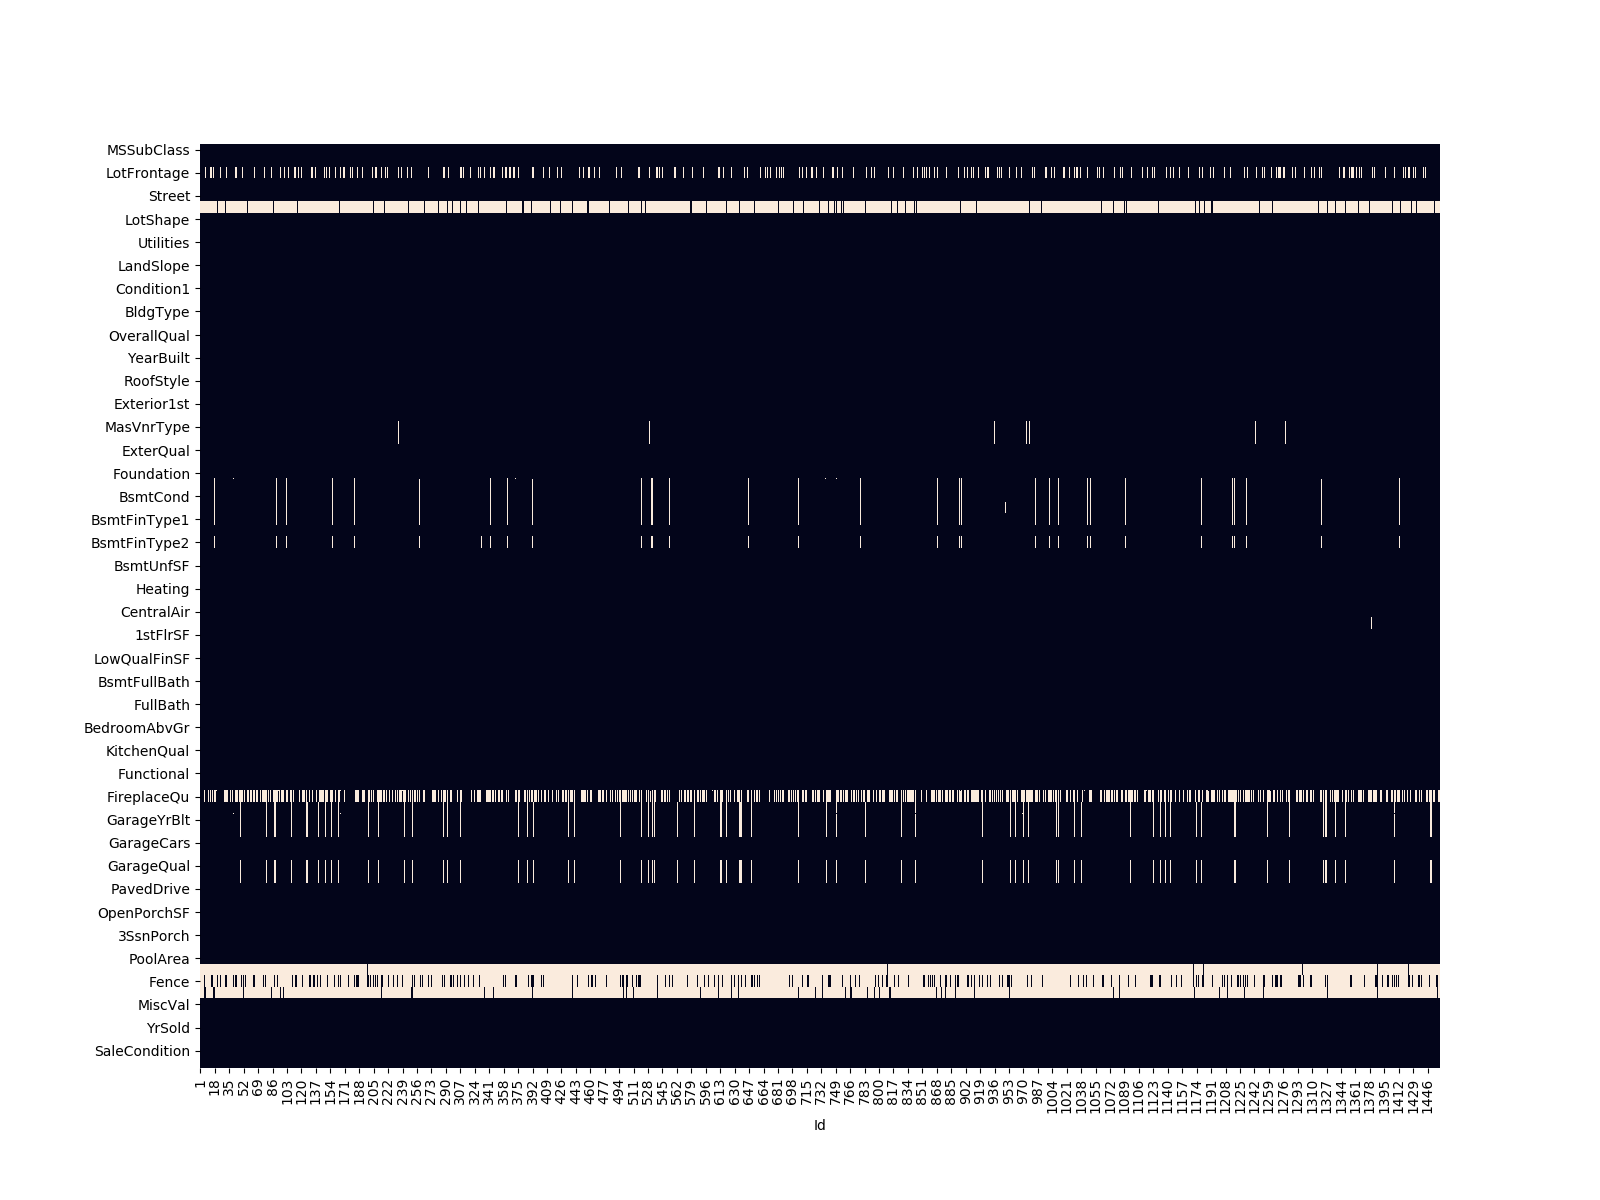

In [21]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(data_train.T.isnull(), cbar=False);

Visualize with [missingno](https://github.com/ResidentMario/missingno) library

In [22]:
import missingno as msno

<IPython.core.display.Javascript object>


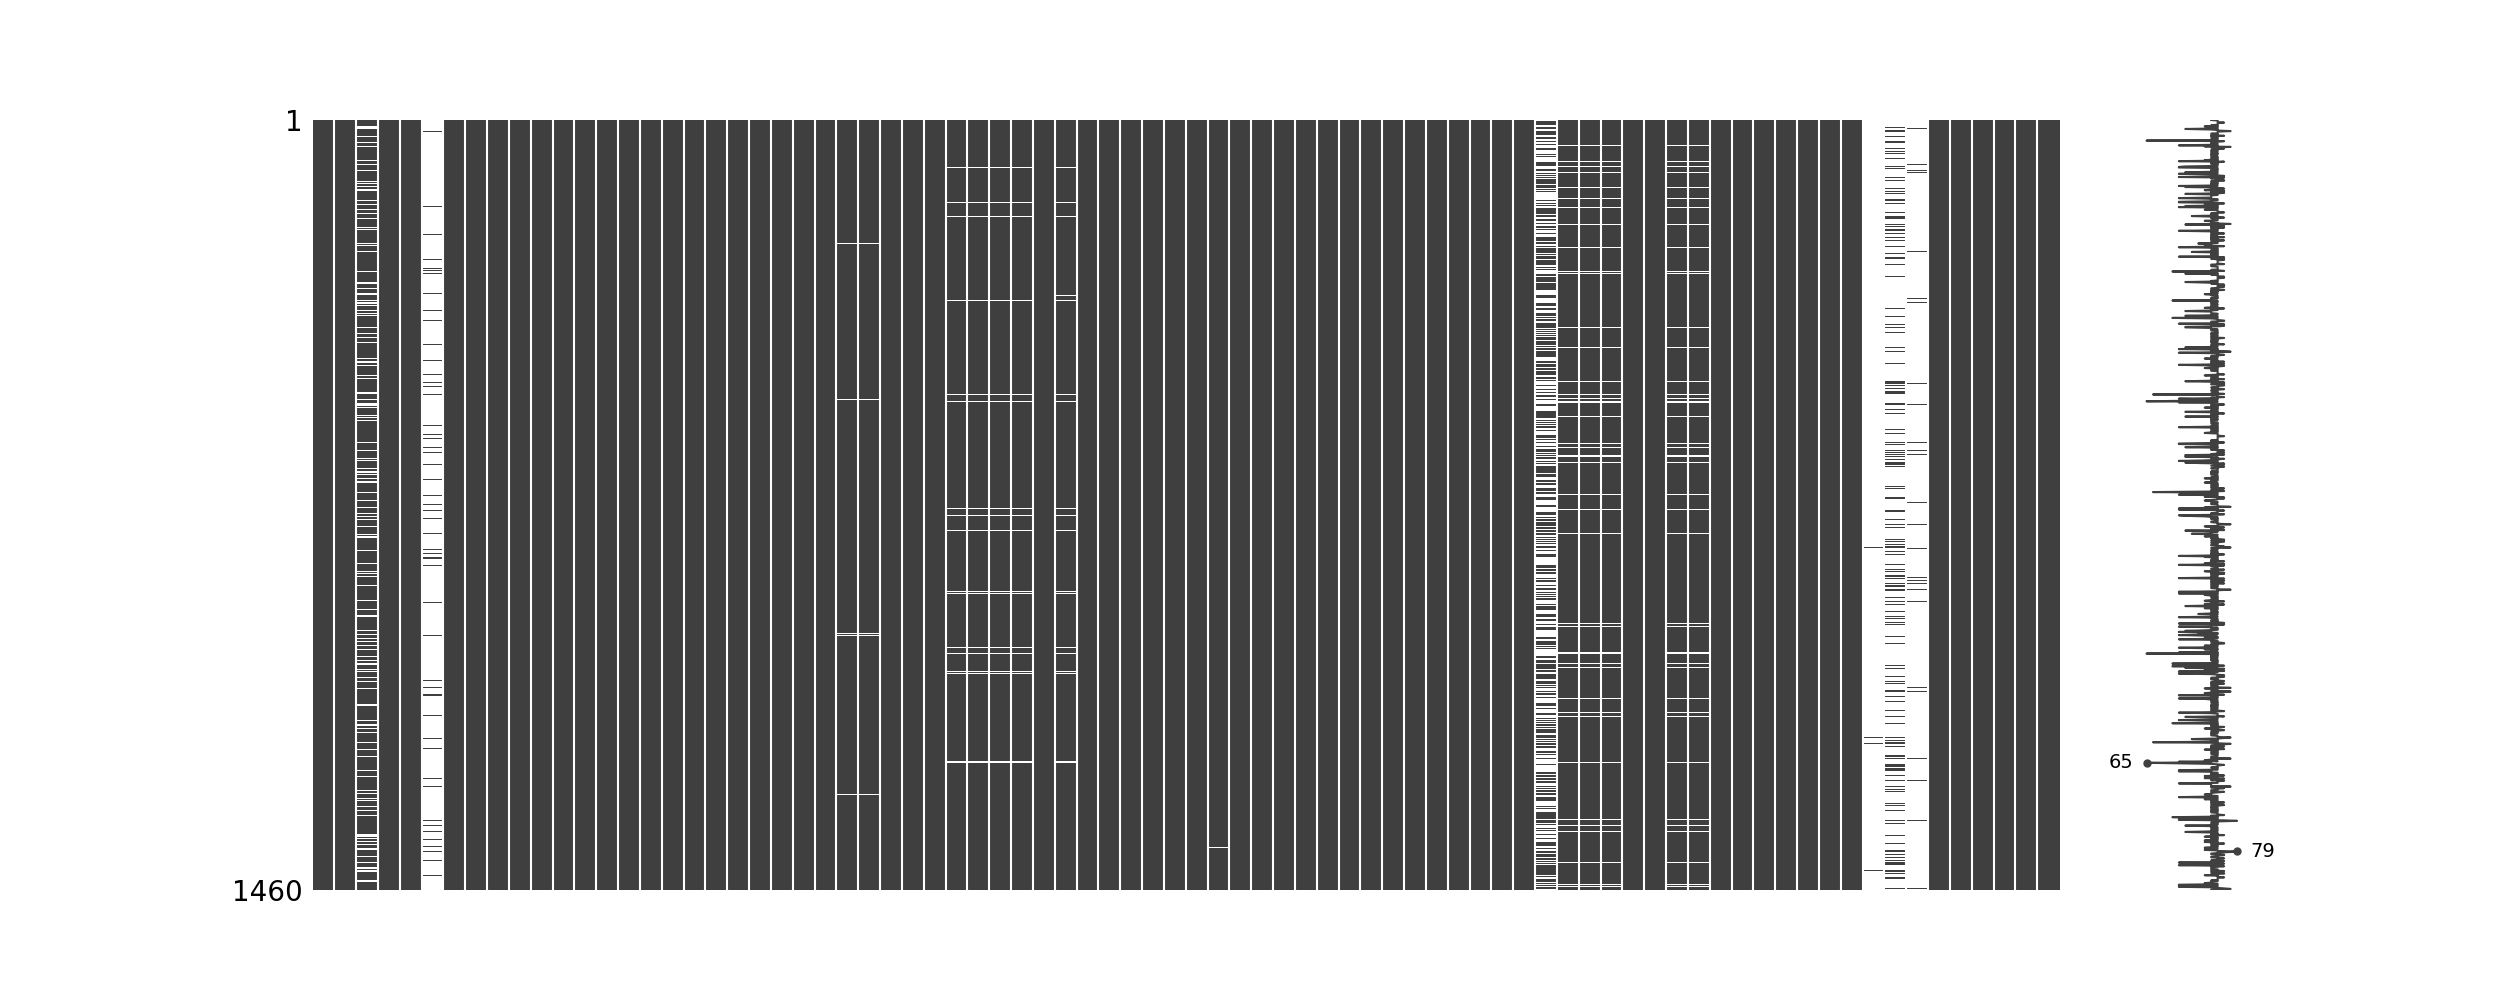

In [23]:
msno.matrix(data_train);

<IPython.core.display.Javascript object>


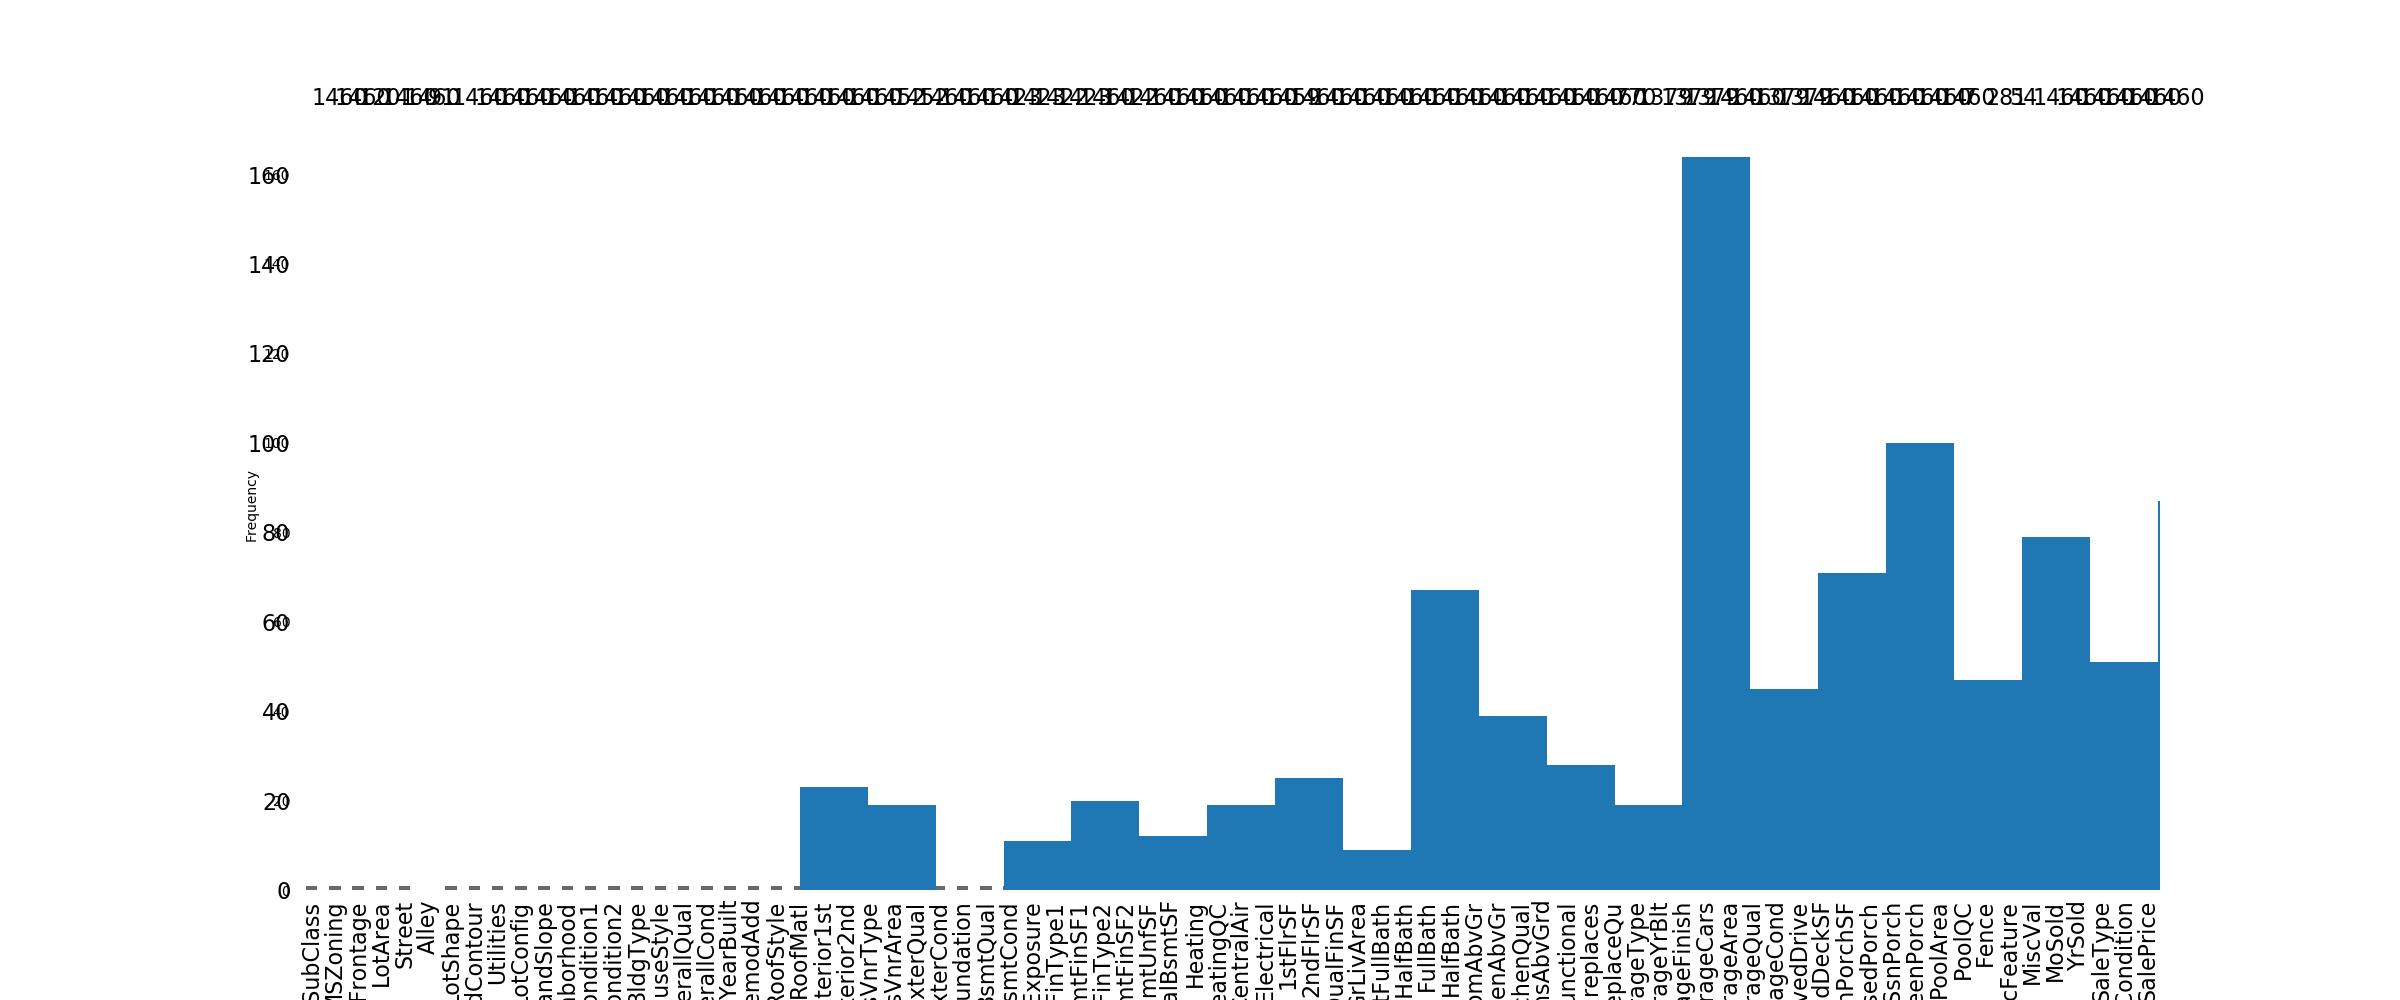

In [24]:
msno.bar(data_train);

In [25]:
attributes_with_missing_data = data_train.isnull().sum(axis=0)
attributes_with_missing_data = attributes_with_missing_data[attributes_with_missing_data > 0]
attributes_with_missing_data = pd.DataFrame(attributes_with_missing_data, columns=["num_nans"])
attributes_with_missing_data.sort_values("num_nans", ascending=False)

,num_nans
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [26]:
attributes_with_missing_data_types = data_train_types.set_index("index").loc[attributes_with_missing_data.index]
attributes_with_missing_data       = attributes_with_missing_data.join(attributes_with_missing_data_types)

In [27]:
attributes_with_missing_data.sort_values(["type", "num_nans"], ascending=True)

,num_nans,type
MasVnrArea,8,float64
GarageYrBlt,81,float64
LotFrontage,259,float64
Electrical,1,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtFinType1,37,object
BsmtExposure,38,object
BsmtFinType2,38,object


### Missing Values - Conclusion

* Most of attributes with missing values are categorical variables
  * no processing required => will be solved implicetly by processing categorical values
* 3 nnumerical variables with missing values
  * 2 area measures, 1 temporal

# Missing Value Handling

These numerical values need to be handled:

In [28]:
attributes_with_missing_data[attributes_with_missing_data["type"] == "float64"].sort_values(["type", "num_nans"], ascending=False)

,num_nans,type
LotFrontage,259,float64
GarageYrBlt,81,float64
MasVnrArea,8,float64


### LotFrontage

In [29]:
data_description_dictionary["LotFrontage"]

'Linear feet of street connected to property'

This description is problematic.

* Does a missing values indicate
  * there is no connected path available (length=0)
  * this value has not been sampled / is unkown

**Check Distribution**

* No 0-valued entries.
  * unlikely that NAN represents "no path available"
* shortest path = 21 feet, average 70 feet.

In [30]:
data_train.LotFrontage.plot(kind='hist', bins=100);

In [31]:
data_train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

**Decission**

**Option 1**

* Fill missing data with global mean values

**Option 2**

* Fill missing data with mean values with respect to related attributes

In [32]:
lot_attributes = data_train.columns[data_train.columns.str.lower().str.contains("lot")].values
lot_attributes

array(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig'], dtype=object)

In [33]:
nan_idx = data_train[data_train.LotFrontage.isnull()].index

data_train.loc[nan_idx, lot_attributes].head(30)

,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
8,NaN,10382,IR1,Corner
13,NaN,12968,IR2,Inside
15,NaN,10920,IR1,Corner
17,NaN,11241,IR1,CulDSac
25,NaN,8246,IR1,Inside
32,NaN,8544,IR1,CulDSac
43,NaN,9180,IR1,CulDSac
44,NaN,9200,IR1,CulDSac
51,NaN,13869,IR2,Corner


In [34]:
for idx in nan_idx:
    
    mean_for_category = data_train[data_train.LotConfig == data_train.loc[idx].LotConfig].LotFrontage.mean()
    
    data_train.loc[idx, "LotFrontage"] = mean_for_category

In [35]:
data_train.loc[nan_idx, lot_attributes].head(30)

,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
8,84.039801,10382,IR1,Corner
13,67.715686,12968,IR2,Inside
15,84.039801,10920,IR1,Corner
17,59.911111,11241,IR1,CulDSac
25,67.715686,8246,IR1,Inside
32,59.911111,8544,IR1,CulDSac
43,59.911111,9180,IR1,CulDSac
44,59.911111,9200,IR1,CulDSac
51,84.039801,13869,IR2,Corner


### GarageYrBlt

In [36]:
data_description_dictionary["GarageYrBlt"]

'Year garage was built'

Again, this description is ambigious:

* does NAN correspond with the absence of a garage?
* or is this information not available?

**Cross-check with other attributes**

In [37]:
garage_attributes = data_train.columns[data_train.columns.str.lower().str.contains("garage")].values
garage_attributes

array(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'], dtype=object)

In [38]:
nan_idx = data_train.GarageYrBlt.isnull()

In [39]:
data_train.loc[nan_idx, garage_attributes]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0,0,NaN,NaN
49,NaN,NaN,NaN,0,0,NaN,NaN
79,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
90,NaN,NaN,NaN,0,0,NaN,NaN
100,NaN,NaN,NaN,0,0,NaN,NaN
109,NaN,NaN,NaN,0,0,NaN,NaN
126,NaN,NaN,NaN,0,0,NaN,NaN
128,NaN,NaN,NaN,0,0,NaN,NaN


In [40]:
data_train.loc[nan_idx, garage_attributes].sum(axis=0)

GarageType      NaN
GarageYrBlt     NaN
GarageFinish    NaN
GarageCars      0.0
GarageArea      0.0
GarageQual      NaN
GarageCond      NaN
dtype: float64

In [41]:
data_train[data_train.GarageArea == 0][garage_attributes].shape

(81, 7)

**Conclusion**

* NAN values correspond with the absence of a garage
* No problem for the corresponding categorical attributes
* How to model the construction year of a missing garage?

**Solution: Transform to categorical data**

Define decades of construction years

In [42]:
data_train.GarageYrBlt.plot(kind='hist', bins=100);

In [43]:
data_train.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [44]:
bins = [1900,1950,1960,1970,1980,1990,2000,2010]

In [45]:
GarageYrBlt_categorical = pd.cut(data_train.GarageYrBlt, bins)
GarageYrBlt_categorical.head()

Id
1    (2000, 2010]
2    (1970, 1980]
3    (2000, 2010]
4    (1990, 2000]
5    (1990, 2000]
Name: GarageYrBlt, dtype: category
Categories (7, interval[int64]): [(1900, 1950] < (1950, 1960] < (1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010]]

In [46]:
GarageYrBlt_categorical_encoded = pd.get_dummies(GarageYrBlt_categorical, prefix="GarageYrBlt_")
GarageYrBlt_categorical_encoded.head()

,"GarageYrBlt__(1900, 1950]","GarageYrBlt__(1950, 1960]","GarageYrBlt__(1960, 1970]","GarageYrBlt__(1970, 1980]","GarageYrBlt__(1980, 1990]","GarageYrBlt__(1990, 2000]","GarageYrBlt__(2000, 2010]"
Id,,,,,,,
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0


In [47]:
data_train = data_train.join(GarageYrBlt_categorical_encoded)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,"GarageYrBlt__(1900, 1950]","GarageYrBlt__(1950, 1960]","GarageYrBlt__(1960, 1970]","GarageYrBlt__(1970, 1980]","GarageYrBlt__(1980, 1990]","GarageYrBlt__(1990, 2000]","GarageYrBlt__(2000, 2010]"
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,0,0,0,0,0,0,1
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,0,0,0,1,0,0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,0,0,0,0,0,0,1
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,0,0,0,0,0,1,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,0,0,0,0,0,1,0


Visual inspection of value range

In [48]:
data_train.drop("GarageYrBlt", inplace=True, axis=1)

## MasVnrArea

In [49]:
data_description_dictionary["MasVnrArea"] # Google translates this to "Mauerwerk Furnierfläche in Quadratfuß"

'Masonry veneer area in square feet'

In [50]:
data_train["MasVnrArea"] = data_train["MasVnrArea"].fillna(data_train.MasVnrArea.mean())

# Handling of Categorical Values

### Quick overview of all categorical attributes

In [51]:
cat_values_overview = data_train[object_values].apply(lambda x : x.unique().shape[0]).sort_values(ascending=False)
cat_values_overview = pd.DataFrame(cat_values_overview, columns=["num categories"])
cat_values_overview["description"] = [data_description_dictionary[x] for x in cat_values_overview.index]
cat_values_overview["values"] = [data_train[x].unique() for x in cat_values_overview.index]
cat_values_overview

,num categories,description,values
Neighborhood,25,Physical locations within Ames city limits,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
Exterior2nd,16,Exterior covering on house (if more than one m...,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ..."
Exterior1st,15,Exterior covering on house,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ..."
SaleType,9,Type of sale,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ..."
Condition1,9,Proximity to various conditions,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."
Condition2,8,Proximity to various conditions (if more than ...,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ..."
HouseStyle,8,Style of dwelling,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,..."
RoofMatl,8,Roof material,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta..."
Functional,7,Home functionality (Assume typical unless dedu...,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]"
BsmtFinType1,7,Rating of basement finished area,"[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]"


In [52]:
cat_values_overview.shape

(43, 3)

**Convert to 'categorical' pandas datatype**

In [53]:
for column_name in data_train[object_values]:
    data_train[column_name] = data_train[column_name].astype("category")

### Encode categorical values

In [54]:
data_train_cat = pd.get_dummies(data_train[object_values])
data_train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


## Bivariate analysis

**Simple plotting**

* e.g. identify correlations

<IPython.core.display.Javascript object>


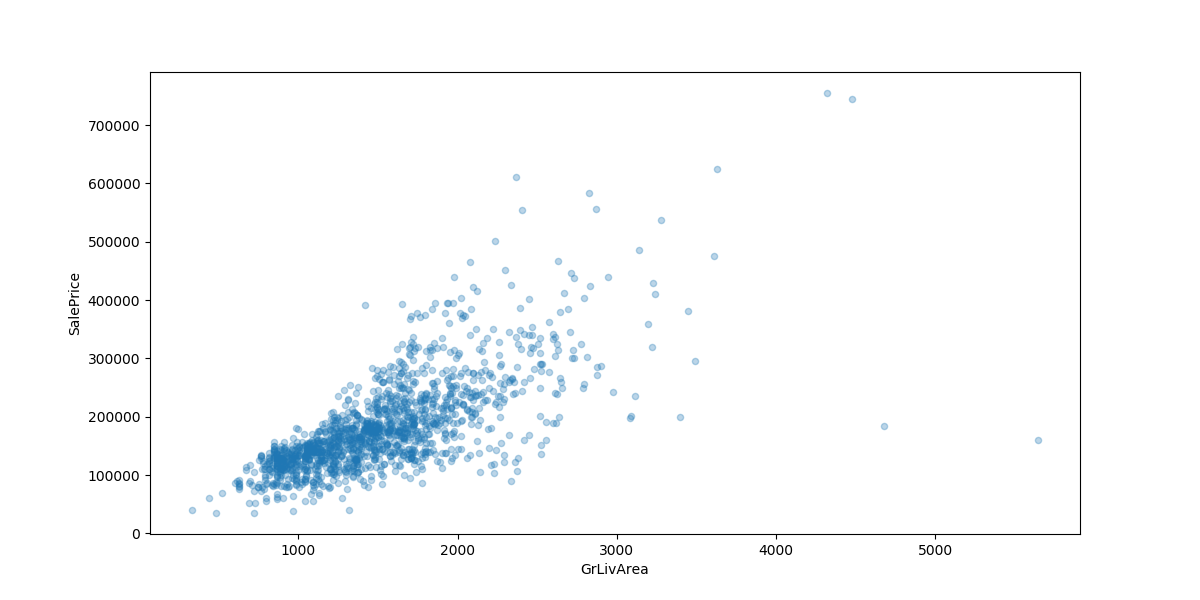

In [55]:
data_train.plot(kind='scatter', x="GrLivArea", y="SalePrice", alpha=0.3, figsize=(12,6));

**Color Coding additional information**

* identify further relationships (e.g. patterns, clusters, etc.)

In [56]:
import matplotlib._color_data as mcd

colors = list(mcd.XKCD_COLORS.keys())[::-35]

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder = encoder.fit(data_train.KitchenQual)

kitchenquality_encoded = encoder.transform(data_train.KitchenQual)

In [58]:
kitchenquality_colors = [colors[int(l)] for l in kitchenquality_encoded]

<IPython.core.display.Javascript object>


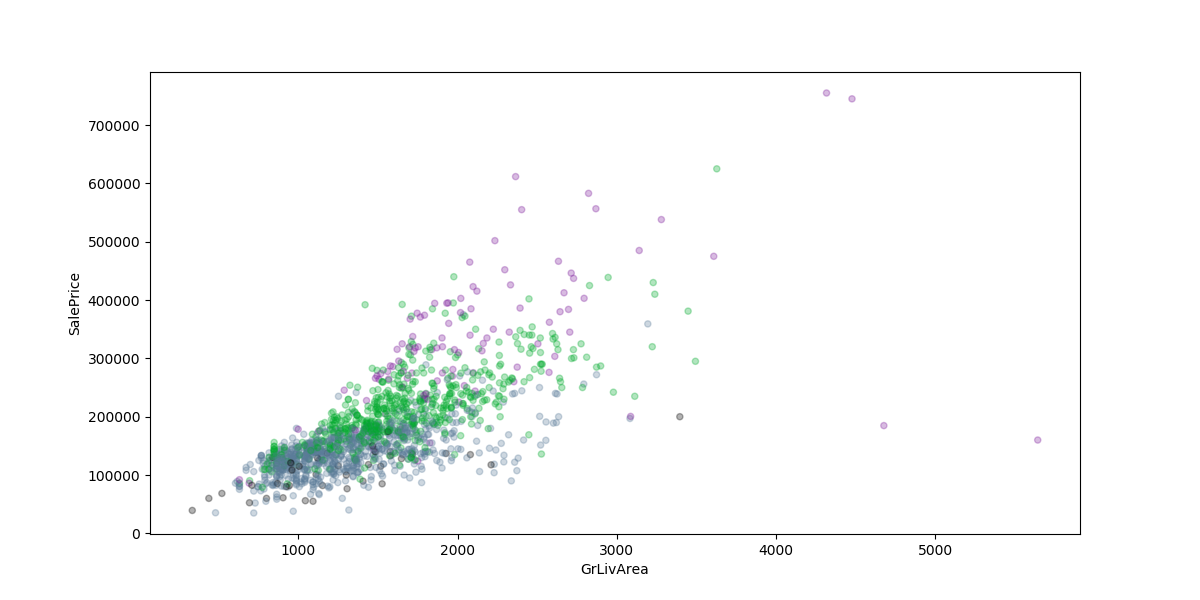

In [59]:
data_train.plot(kind='scatter', x="GrLivArea", y="SalePrice", alpha=0.3, figsize=(12,6), c=kitchenquality_colors);

**Plot pairwise relationships**

<IPython.core.display.Javascript object>


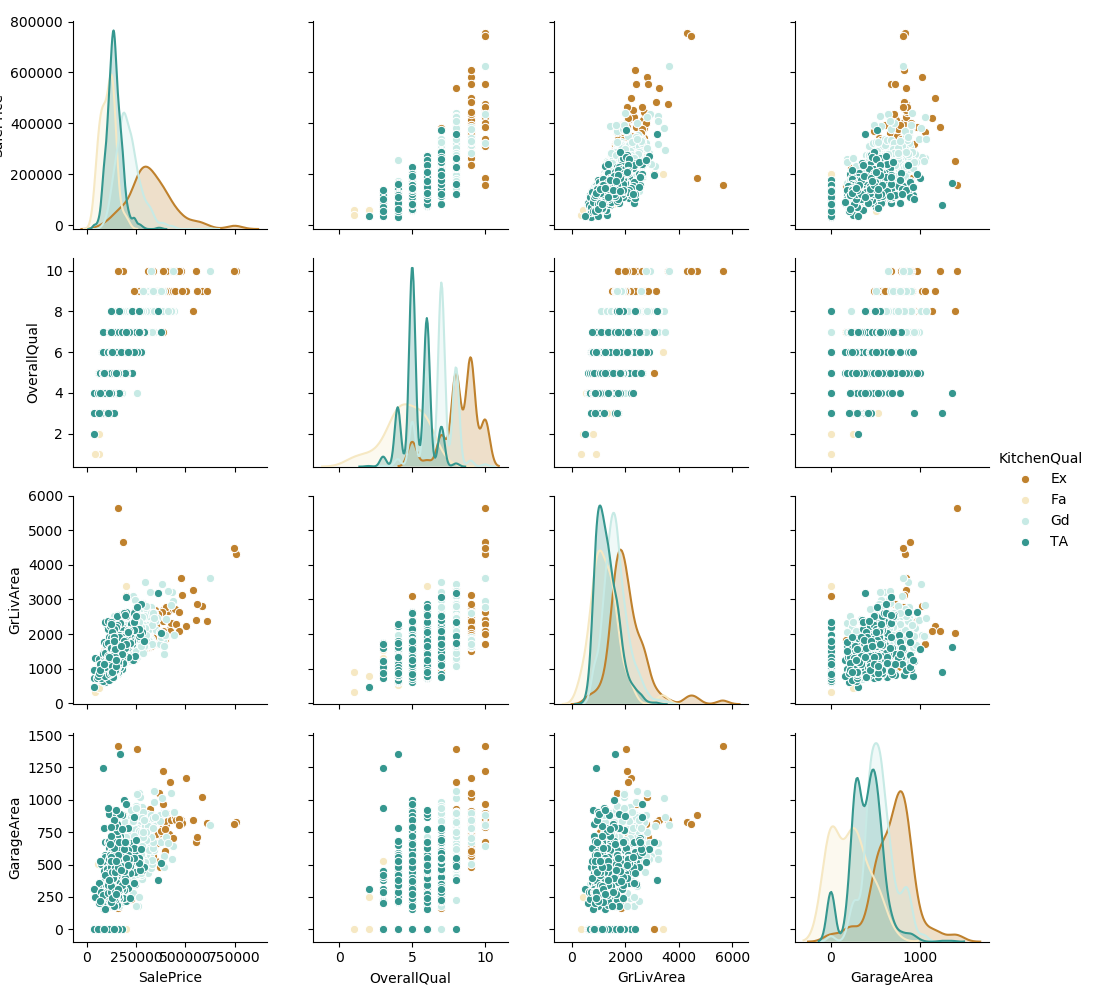

In [60]:
sns.pairplot(data_train, vars=["SalePrice", "OverallQual", "GrLivArea", "GarageArea"], hue="KitchenQual", palette="BrBG");

### Categorical Values

<IPython.core.display.Javascript object>


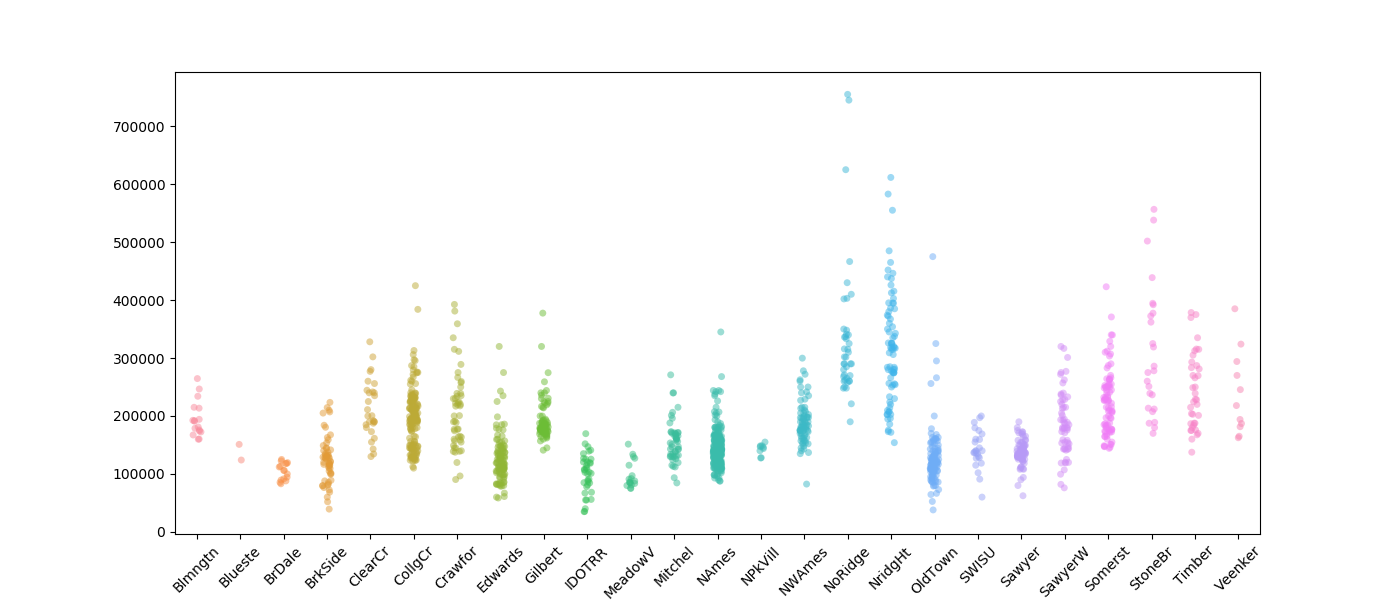

In [61]:
fig, ax = plt.subplots(figsize=(14,6))
sns.stripplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = np.sort(data_train.Neighborhood.unique()),
              jitter = 0.1, 
              alpha  = 0.5, 
              ax     = ax);
 
plt.xticks(rotation=45);

Sort by mean sales price per neighborhood

In [62]:
Neighborhood_meanSP = data_train.groupby('Neighborhood')['SalePrice'].mean()

<IPython.core.display.Javascript object>


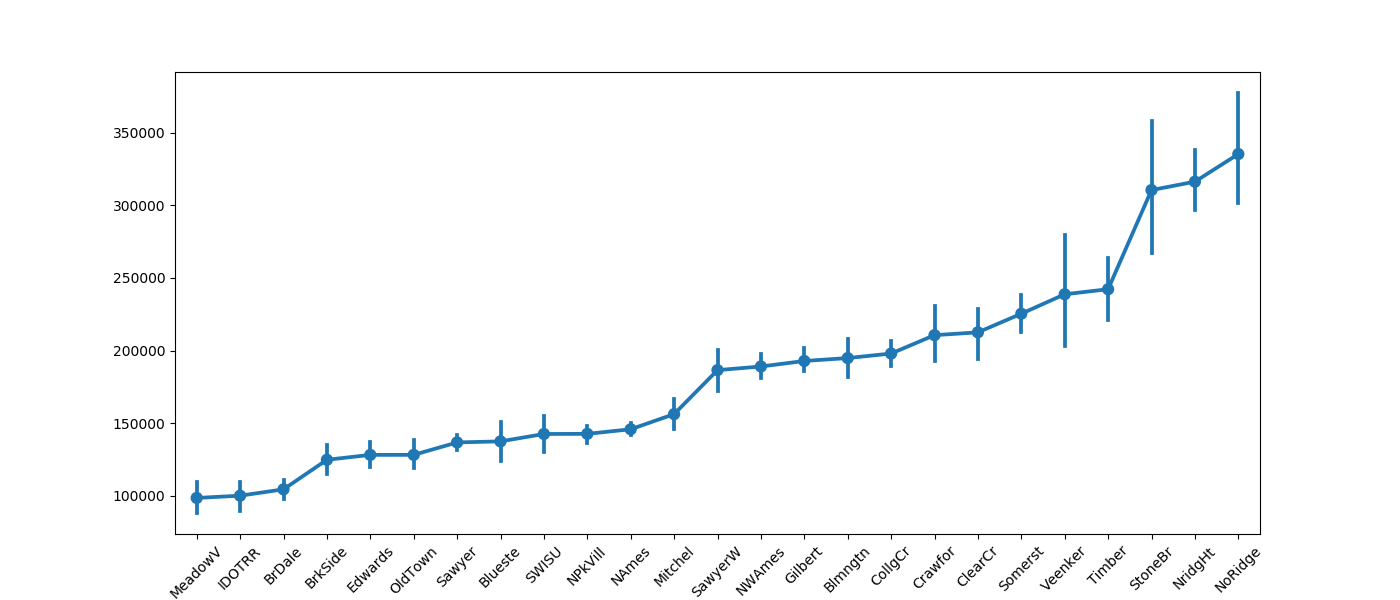

In [63]:
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = Neighborhood_meanSP.sort_values().index)
 
plt.xticks(rotation=45);

# Preparing Feature-Space

Add encoded categorical data to source data

In [64]:
X = data_train.join(data_train_cat)

Remove original categorical data

In [65]:
X.drop(object_values, axis=1, inplace=True)

In [66]:
X.shape

(1460, 295)

define target variable

In [67]:
Y = X.SalePrice

Remove target values from training data

# Correlations with target variable

In [68]:
# calculate correlations
corr_matrix = X.corr()
# take magnitude of correlation
corr_matrix = corr_matrix.abs()
# sort one axis by magnitude of correlation
corr_matrix = corr_matrix.sort_values("SalePrice", ascending=False)
# sort other axis by magnitude of correlation
corr_matrix = corr_matrix.T.sort_values("SalePrice", ascending=False).T

corr_matrix.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,...,Condition1_RRNe,LotConfig_Corner,BldgType_TwnhsE,Condition2_RRAe,Foundation_Wood,GarageCond_Gd,"GarageYrBlt__(1980, 1990]",RoofStyle_Mansard,RoofMatl_Metal,BsmtFinType2_GLQ
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.589044,0.560664,0.553105,...,0.004584,0.004145,0.003804,0.002993,0.002711,0.000983,0.000424,0.000308,0.000304,0.000076
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.646247,0.550600,0.470780,...,0.010734,0.007889,0.128662,0.020817,0.018621,0.011987,0.016922,0.004986,0.001881,0.001985
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.386146,0.630012,0.309962,...,0.014915,0.064427,0.112542,0.055048,0.031144,0.010442,0.003280,0.060644,0.026288,0.016437
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.481825,0.469672,0.356425,...,0.011545,0.019674,0.066799,0.008161,0.014145,0.001123,0.049406,0.008364,0.008161,0.002449
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.445260,0.405656,0.370223,...,0.001476,0.030147,0.002714,0.015559,0.017413,0.008646,0.068216,0.003473,0.008209,0.014262


<IPython.core.display.Javascript object>


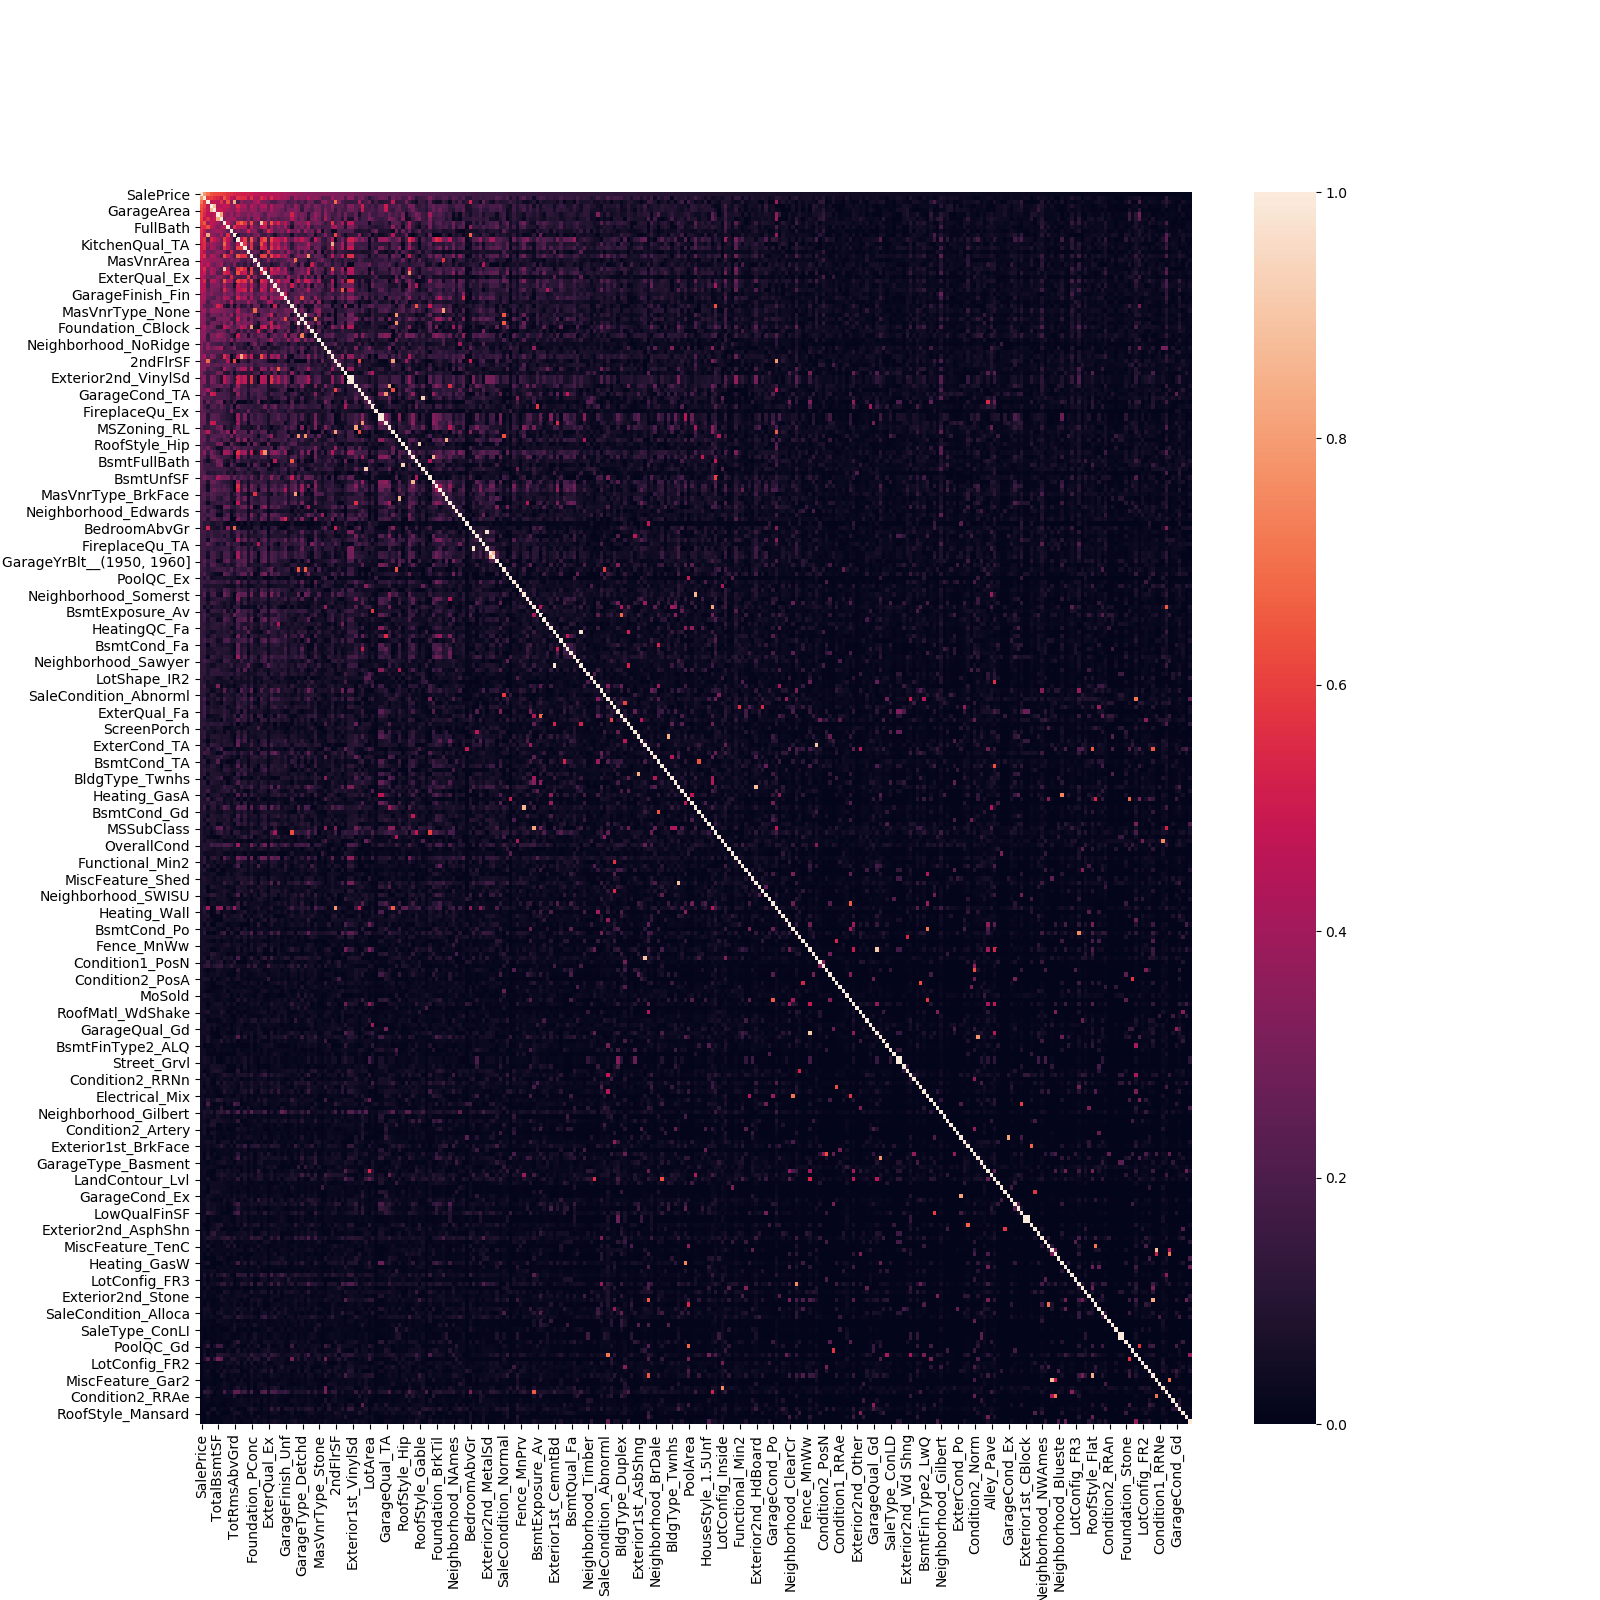

In [69]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr_matrix);

# Define model for prediction

## Validation using StratifiedShuffleSplit

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
# define Splitter
skf = StratifiedKFold(n_splits  = 10, shuffle=True)

Quick debug of K-Fold splits

In [72]:
fold = 1

for train_idx, test_idx in skf.split(X, data_train.KitchenQual):
    
    print("Fold: %d" % fold)
    print("Train-data:", X.iloc[train_idx].shape)
    print("Test-data :", X.iloc[test_idx].shape)
    
    fold += 1

Fold: 1
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 2
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 3
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 4
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 5
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 6
Train-data: (1314, 295)
Test-data : (146, 295)
Fold: 7
Train-data: (1315, 295)
Test-data : (145, 295)
Fold: 8
Train-data: (1315, 295)
Test-data : (145, 295)
Fold: 9
Train-data: (1315, 295)
Test-data : (145, 295)
Fold: 10
Train-data: (1316, 295)
Test-data : (144, 295)


## Training a simple model

In [73]:
X.drop("SalePrice", axis=1, inplace=True)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [75]:
# define Splitter
skf = StratifiedKFold(n_splits  = 10, shuffle=True, random_state=0)

In [76]:
fold_results = []

for train_idx, test_idx in skf.split(X, data_train.Neighborhood):
    
    pca = PCA(n_components=200, svd_solver='full')
    pca.fit(X.iloc[train_idx].values)
    
    model = LinearRegression(normalize=False)
    model.fit(pca.transform(X.iloc[train_idx]), Y.iloc[train_idx])
    
    y_true = Y.iloc[test_idx].values
    
    y_pred = model.predict(pca.transform(X.iloc[test_idx]))
    
    fold_results.append([y_true, y_pred])

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
eval_mse = [mean_squared_error(y_true, y_pred) for y_true, y_pred in fold_results]
eval_mae = [mean_absolute_error(y_true, y_pred) for y_true, y_pred in fold_results]
eval_r2  = [r2_score(y_true, y_pred) for y_true, y_pred in fold_results]

In [79]:
result_table         = pd.DataFrame([np.mean(eval_mse), np.mean(eval_mae), np.mean(eval_r2)]).T
result_table.columns = ["mse mean", "mae mean", "r2 mean"]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
result_table

,mse mean,mae mean,r2 mean
0,1218468448.570,19100.988,0.798


predict test data

### Evaluating further models

In [80]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [81]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

In [82]:
model = Ridge(alpha=0.7, normalize=True, solver='svd')

results = cross_validate(model, X, Y, data_train.Neighborhood, cv=skf, scoring={'r2' : make_scorer(r2_score),
                                                                                'mse': make_scorer(mean_squared_error),
                                                                                'mae': make_scorer(mean_absolute_error)})

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [83]:
result_ridge = pd.DataFrame(np.array([results["test_mse"], results["test_mae"], results["test_r2"]]).T, columns=["mse", "mae", "r2"]).mean(axis=0)
result_ridge

mse   1542031217.755
mae        16315.315
r2            -0.108
dtype: float64

In [84]:
model = Lasso(alpha=0.5, normalize=True)

results = cross_validate(model, X, Y, data_train.Neighborhood, cv=skf, scoring={'r2' : make_scorer(r2_score),
                                                                                'mse': make_scorer(mean_squared_error),
                                                                                'mae': make_scorer(mean_absolute_error)})

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

In [85]:
result_lasso = pd.DataFrame(np.array([results["test_mse"], results["test_mae"], results["test_r2"]]).T, columns=["mse", "mae", "r2"]).mean(axis=0)
result_lasso

mse   1898780202.417
mae        16584.259
r2            -0.433
dtype: float64

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

In [87]:
# reduce number of folds for the presentation (it takes long to compute)
skf = StratifiedKFold(n_splits  = 4, shuffle=True)

svr_pipeline = make_pipeline(StandardScaler(),  SVR(kernel='linear', C=1e3))

results = cross_validate(svr_pipeline, X, Y, data_train.Neighborhood, cv=skf, scoring={'r2' : make_scorer(r2_score),
                                                                                'mse': make_scorer(mean_squared_error),
                                                                                'mae': make_scorer(mean_absolute_error)})

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


In [88]:
result_svr = pd.DataFrame(np.array([results["test_mse"], results["test_mae"], results["test_r2"]]).T, columns=["mse", "mae", "r2"]).mean(axis=0)
result_svr

mse   1202251592.501
mae        17690.665
r2             0.802
dtype: float64

# Evaluation Results

In [89]:
eval_result_table = pd.DataFrame(np.concatenate([result_table.values, [result_lasso.values], [result_lasso.values], [result_svr.values]], axis=0), columns=["mse mean", "mae mean", "r2 mean"])
eval_result_table.index = ["linear regression", "ridge", "lasso", "svr"]
eval_result_table

,mse mean,mae mean,r2 mean
linear regression,1218468448.570,19100.988,0.798
ridge,1898780202.417,16584.259,-0.433
lasso,1898780202.417,16584.259,-0.433
svr,1202251592.501,17690.665,0.802


In [90]:
eval_result_table.sort_values("mae mean", ascending=True)

,mse mean,mae mean,r2 mean
ridge,1898780202.417,16584.259,-0.433
lasso,1898780202.417,16584.259,-0.433
svr,1202251592.501,17690.665,0.802
linear regression,1218468448.570,19100.988,0.798
